## Use DenseNet to train CIFAR-10 datasets

#### Use 40-layer version and 100-layer version in this notebook

In [ ]:
import tensorflow as tf

In [ ]:
! tar -xf "/content/drive/My Drive/cifar-10-python.tar.gz"

## Build 40-layer DenseNet, train and evaluate model

In [ ]:
from densenet import build_densenet

In [ ]:
model_40=build_densenet(40)

In [ ]:
model_40.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 32, 32, 24)   648         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 32, 32, 24)   96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 32, 32, 24)   0           batch_normalization[0][0]        
______________________________________________________________________________________________

## Process the input

In [ ]:
from densenet import get_input

In [ ]:
train_img,train_labels,label_names,test_img,test_labels=get_input('cifar-10-batches-py/')

In [ ]:
print(train_img.shape)

(50000, 32, 32, 3)


In [ ]:
print(test_img.shape)

(10000, 32, 32, 3)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

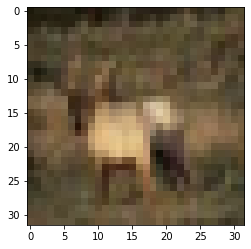

b'deer'


In [ ]:
%matplotlib inline
plt.imshow(train_img[3])
plt.show()
print(label_names[train_labels[3]])

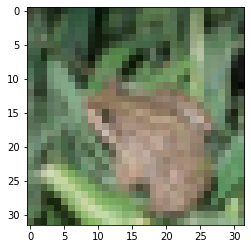

b'frog'


In [ ]:
%matplotlib inline
plt.imshow(test_img[4])
plt.show()
print(label_names[test_labels[4]])

In [ ]:
from densenet import process_input

In [ ]:
x_train,x_test,y_train,y_test=process_input(train_img,test_img,train_labels,test_labels)

In [ ]:
print(x_train.shape)

(50000, 32, 32, 3)


In [ ]:
print(np.max(x_train[0]))

2.2950718


In [ ]:
print(np.min(x_train[0]))

-1.9551449


In [ ]:
print(np.max(x_test[0]))
print(np.min(x_test[0]))

2.5137117
-1.7699685


In [ ]:
print(y_train.shape)
print(y_test.shape)

(50000, 10)
(10000, 10)


In [ ]:
from densenet import compile_and_fit

In [ ]:
hist_40,model_40=compile_and_fit(x_train,y_train,model_40,x_test,y_test,batch_size=8,epochs=40)

Epoch 1/40
6250/6250 [==============================] - 137s 22ms/step - loss: 1.6233 - accuracy: 0.4805 - val_loss: 1.5365 - val_accuracy: 0.5496 - lr: 0.0010
Epoch 2/40
6250/6250 [==============================] - 136s 22ms/step - loss: 1.2855 - accuracy: 0.6096 - val_loss: 1.4307 - val_accuracy: 0.5833 - lr: 0.0010
Epoch 3/40
6250/6250 [==============================] - 136s 22ms/step - loss: 1.1800 - accuracy: 0.6456 - val_loss: 1.1414 - val_accuracy: 0.6745 - lr: 0.0010
Epoch 4/40
6250/6250 [==============================] - 137s 22ms/step - loss: 1.1066 - accuracy: 0.6763 - val_loss: 1.5476 - val_accuracy: 0.5536 - lr: 0.0010
Epoch 5/40
6250/6250 [==============================] - 135s 22ms/step - loss: 1.0435 - accuracy: 0.7020 - val_loss: 1.0707 - val_accuracy: 0.7036 - lr: 0.0010
Epoch 6/40
6250/6250 [==============================] - 136s 22ms/step - loss: 0.9987 - accuracy: 0.7212 - val_loss: 0.9540 - val_accuracy: 0.7407 - lr: 0.0010
Epoch 7/40
6250/6250 [==================

In [ ]:
model_40.save('densenet40.h5')

In [ ]:
print(hist_40.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy', 'lr'])


In [ ]:
with open('result.txt','w') as f:
  for value in hist_40.history['loss']:
    f.write(str(value)+' ')
  f.write('\n')
  for value in hist_40.history['val_loss']:
    f.write(str(value)+' ')
  f.write('\n')
  for value in hist_40.history['accuracy']:
    f.write(str(value)+' ')
  f.write('\n')
  for value in hist_40.history['val_accuracy']:
    f.write(str(value)+' ')

In [ ]:
model_40.evaluate(x_train,y_train,batch_size=8)

6250/6250 [==============================] - 41s 6ms/step - loss: 0.4248 - accuracy: 0.9048


[0.4247627258300781, 0.9048200249671936]

In [ ]:
model_40.evaluate(x_test,y_test,batch_size=8)

1250/1250 [==============================] - 8s 6ms/step - loss: 0.5560 - accuracy: 0.8659


[0.5559876561164856, 0.8658999800682068]

## Build 100-layer densenet and train, evaluate model

In [ ]:
model_100=build_densenet(100)

In [ ]:
model_100.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 32, 32, 24)   648         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 32, 32, 24)   96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 32, 32, 24)   0           batch_normalization[0][0]        
______________________________________________________________________________________________

In [ ]:
hist_100,model_100=compile_and_fit(x_train,y_train,model_100,x_test,y_test,batch_size=8,epochs=20)

Epoch 1/20
6250/6250 [==============================] - 361s 58ms/step - loss: 1.7541 - accuracy: 0.4970 - val_loss: 2.6774 - val_accuracy: 0.3792 - lr: 0.0010
Epoch 2/20
6250/6250 [==============================] - 345s 55ms/step - loss: 1.2944 - accuracy: 0.6356 - val_loss: 1.2437 - val_accuracy: 0.6661 - lr: 0.0010
Epoch 3/20
6250/6250 [==============================] - 346s 55ms/step - loss: 1.1673 - accuracy: 0.6868 - val_loss: 1.1503 - val_accuracy: 0.7068 - lr: 0.0010
Epoch 4/20
6250/6250 [==============================] - 349s 56ms/step - loss: 1.0744 - accuracy: 0.7260 - val_loss: 1.0189 - val_accuracy: 0.7584 - lr: 0.0010
Epoch 5/20
6250/6250 [==============================] - 343s 55ms/step - loss: 1.0184 - accuracy: 0.7473 - val_loss: 0.9645 - val_accuracy: 0.7693 - lr: 0.0010
Epoch 6/20
6250/6250 [==============================] - 337s 54ms/step - loss: 0.9808 - accuracy: 0.7610 - val_loss: 1.0102 - val_accuracy: 0.7626 - lr: 0.0010
Epoch 7/20
6250/6250 [==================

In [ ]:
model_100.save('model_100_stage_1.h5')

In [ ]:
with open('result_100_stage_1.txt','w') as f:
  for value in hist_100.history['loss']:
    f.write(str(value)+' ')
  f.write('\n')
  for value in hist_100.history['val_loss']:
    f.write(str(value)+' ')
  f.write('\n')
  for value in hist_100.history['accuracy']:
    f.write(str(value)+' ')
  f.write('\n')
  for value in hist_100.history['val_accuracy']:
    f.write(str(value)+' ')

In [ ]:
! unzip "/content/drive/My Drive/model_100_stage_1.zip"

Archive:  /content/drive/My Drive/model_100_stage_1.zip
  inflating: model_100_stage_1.h5    


In [ ]:
model_100=tf.keras.models.load_model("model_100_stage_1.h5")

In [ ]:
hist_100,model_100=compile_and_fit(x_train,y_train,model_100,x_test,y_test,batch_size=8,epochs=20)

Epoch 1/20
6250/6250 [==============================] - 267s 43ms/step - loss: 0.6376 - accuracy: 0.8660 - val_loss: 0.6036 - val_accuracy: 0.8748 - lr: 1.0000e-04
Epoch 2/20
6250/6250 [==============================] - 263s 42ms/step - loss: 0.5877 - accuracy: 0.8772 - val_loss: 0.5914 - val_accuracy: 0.8774 - lr: 1.0000e-04
Epoch 3/20
6250/6250 [==============================] - 262s 42ms/step - loss: 0.5600 - accuracy: 0.8838 - val_loss: 0.5926 - val_accuracy: 0.8737 - lr: 1.0000e-04
Epoch 4/20
6250/6250 [==============================] - 264s 42ms/step - loss: 0.5386 - accuracy: 0.8884 - val_loss: 0.5825 - val_accuracy: 0.8751 - lr: 1.0000e-04
Epoch 5/20
6250/6250 [==============================] - 265s 42ms/step - loss: 0.5188 - accuracy: 0.8911 - val_loss: 0.5526 - val_accuracy: 0.8810 - lr: 1.0000e-04
Epoch 6/20
6250/6250 [==============================] - 264s 42ms/step - loss: 0.5038 - accuracy: 0.8942 - val_loss: 0.5561 - val_accuracy: 0.8800 - lr: 1.0000e-04
Epoch 7/20
6250/

In [ ]:
model_100.evaluate(x_train,y_train,batch_size=8)

6250/6250 [==============================] - 74s 12ms/step - loss: 0.3494 - accuracy: 0.9346


[0.3494164049625397, 0.9346200227737427]

In [ ]:
model_100.evaluate(x_test,y_test,batch_size=8)

1250/1250 [==============================] - 15s 12ms/step - loss: 0.5054 - accuracy: 0.8872


[0.5053815841674805, 0.8871999979019165]

In [ ]:
model_100.save('model_100_final.h5')

In [ ]:
with open('result_100_final.txt','w') as f:
  for value in hist_100.history['loss']:
    f.write(str(value)+' ')
  f.write('\n')
  for value in hist_100.history['val_loss']:
    f.write(str(value)+' ')
  f.write('\n')
  for value in hist_100.history['accuracy']:
    f.write(str(value)+' ')
  f.write('\n')
  for value in hist_100.history['val_accuracy']:
    f.write(str(value)+' ')

## Retrieve from files and plot the diagram

In [ ]:
def retrieve_from_file(file_name):
  arr={}
  with open(file_name,'r') as f:
    arr['loss']=f.readline().split(' ')[:-1]
    for i in range(len(arr['loss'])):arr['loss'][i]=float(arr['loss'][i])
    arr['val_loss']=f.readline().split(' ')[:-1]
    for i in range(len(arr['val_loss'])):arr['val_loss'][i]=float(arr['val_loss'][i])
    arr['accuracy']=f.readline().split(' ')[:-1]
    for i in range(len(arr['accuracy'])):arr['accuracy'][i]=float(arr['accuracy'][i])
    arr['val_accuracy']=f.readline().split(' ')[:-1]
    for i in range(len(arr['val_accuracy'])):arr['val_accuracy'][i]=float(arr['val_accuracy'][i])
    return arr

In [ ]:
arr_40=retrieve_from_file('result.txt')
print(arr_40)

{'loss': [1.6232775449752808, 1.285503625869751, 1.1800340414047241, 1.1065922975540161, 1.043497085571289, 0.9987183809280396, 0.97259122133255, 0.9525353908538818, 0.931036651134491, 0.9122375249862671, 0.9007319808006287, 0.8877012729644775, 0.8750284910202026, 0.861830472946167, 0.8551486134529114, 0.8415113091468811, 0.8350039124488831, 0.8289092779159546, 0.8257009387016296, 0.8168530464172363, 0.704975962638855, 0.6618921160697937, 0.6352075934410095, 0.6196274757385254, 0.6067262887954712, 0.596616268157959, 0.5839729905128479, 0.5795642733573914, 0.5680882930755615, 0.5596574544906616, 0.5471640229225159, 0.5415704846382141, 0.542169988155365, 0.5379903316497803, 0.5364381074905396, 0.534355878829956, 0.5298358798027039, 0.5325905084609985, 0.530078113079071, 0.5309431552886963], 'val_loss': [1.5365235805511475, 1.430688500404358, 1.1414440870285034, 1.547577977180481, 1.0707454681396484, 0.95401930809021, 0.9980130791664124, 0.8701704144477844, 0.991554856300354, 0.9390838146

In [ ]:
arr_100_stage_1=retrieve_from_file('result_100_stage_1.txt')
print(arr_100_stage_1)

{'loss': [1.7540600299835205, 1.2943880558013916, 1.1672652959823608, 1.074410319328308, 1.0184462070465088, 0.9807513952255249, 0.9517003297805786, 0.9223372936248779, 0.89761883020401, 0.8774932622909546, 0.861515998840332, 0.8469836115837097, 0.8303146958351135, 0.8189777135848999, 0.8051677346229553, 0.7960556745529175, 0.7915356755256653, 0.7789174318313599, 0.7723701000213623, 0.7639650702476501], 'val_loss': [2.6773695945739746, 1.243712306022644, 1.1503089666366577, 1.01889169216156, 0.9645341634750366, 1.010194182395935, 0.8556281328201294, 1.0148117542266846, 0.8281624913215637, 0.8997396230697632, 0.7872095108032227, 0.9592326283454895, 0.8052370548248291, 0.9626217484474182, 0.7687187790870667, 0.984876275062561, 0.7625011801719666, 0.8263023495674133, 0.7811936736106873, 0.7896726727485657], 'accuracy': [0.4970000088214874, 0.6355999708175659, 0.6868399977684021, 0.7259600162506104, 0.7472800016403198, 0.7609800100326538, 0.7677800059318542, 0.7782999873161316, 0.786220014

In [ ]:
arr_100_stage_2=retrieve_from_file('result_100_final.txt')
print(arr_100_stage_2)

{'loss': [0.6375589370727539, 0.5877295732498169, 0.5600325465202332, 0.5385587215423584, 0.518779993057251, 0.5038415789604187, 0.49045422673225403, 0.47820496559143066, 0.46770891547203064, 0.45604273676872253, 0.4382898509502411, 0.43068841099739075, 0.4306035041809082, 0.4341766834259033, 0.4240958094596863, 0.4239061772823334, 0.4227941930294037, 0.41988319158554077, 0.42021653056144714, 0.41790011525154114], 'val_loss': [0.6036140322685242, 0.5913567543029785, 0.5926095843315125, 0.5824633836746216, 0.5526151657104492, 0.5560517311096191, 0.5362018346786499, 0.5396758913993835, 0.5360214114189148, 0.5549614429473877, 0.5234106779098511, 0.5209246873855591, 0.5207125544548035, 0.5173579454421997, 0.5064927935600281, 0.5057004690170288, 0.5111243724822998, 0.5105785727500916, 0.5052310824394226, 0.5053815841674805], 'accuracy': [0.8660200238227844, 0.8771600127220154, 0.8837599754333496, 0.8883799910545349, 0.8911399841308594, 0.8942199945449829, 0.8954399824142456, 0.8985599875450

In [ ]:
arr_100={}
arr_100['loss']=arr_100_stage_1['loss']+arr_100_stage_2['loss']
arr_100['val_loss']=arr_100_stage_1['val_loss']+arr_100_stage_2['val_loss']
arr_100['accuracy']=arr_100_stage_1['accuracy']+arr_100_stage_2['accuracy']
arr_100['val_accuracy']=arr_100_stage_1['val_accuracy']+arr_100_stage_2['val_accuracy']

In [ ]:
epochs=np.arange(1,41)
print(epochs)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40]


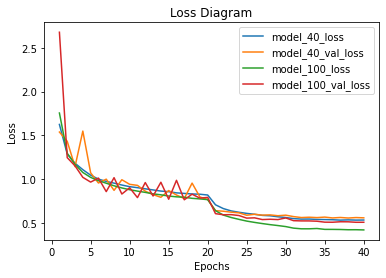

In [ ]:
%matplotlib inline
plt.plot(epochs,arr_40['loss'],label='model_40_loss')
plt.plot(epochs,arr_40['val_loss'],label='model_40_val_loss')
plt.plot(epochs,arr_100['loss'],label='model_100_loss')
plt.plot(epochs,arr_100['val_loss'],label='model_100_val_loss')
plt.legend(loc='upper right')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Diagram')
plt.savefig('loss.png')
plt.show()

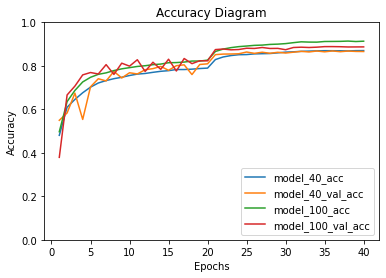

In [ ]:
%matplotlib inline
plt.plot(epochs,arr_40['accuracy'],label='model_40_acc')
plt.plot(epochs,arr_40['val_accuracy'],label='model_40_val_acc')
plt.plot(epochs,arr_100['accuracy'],label='model_100_acc')
plt.plot(epochs,arr_100['val_accuracy'],label='model_100_val_acc')
plt.legend(loc='lower right')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.ylim(0,1)
plt.title('Accuracy Diagram')
plt.savefig('accuracy.png')
plt.show()